In [67]:
pip install librosa matplotlib

In [68]:
!pip install soundfile

**1.LOADING THE AUDIO**

In [69]:
import librosa
# Load audio file
audio_path = '/content/jackhammer.wav'
audio, sr = librosa.load(audio_path, sr=None)

print("Frame rate (samples per second):", sr)
print("Number of frames:", audio.shape[0])

Frame rate (samples per second): 44100
Number of frames: 147590


**2.VISUALIZE WAVEFORM**



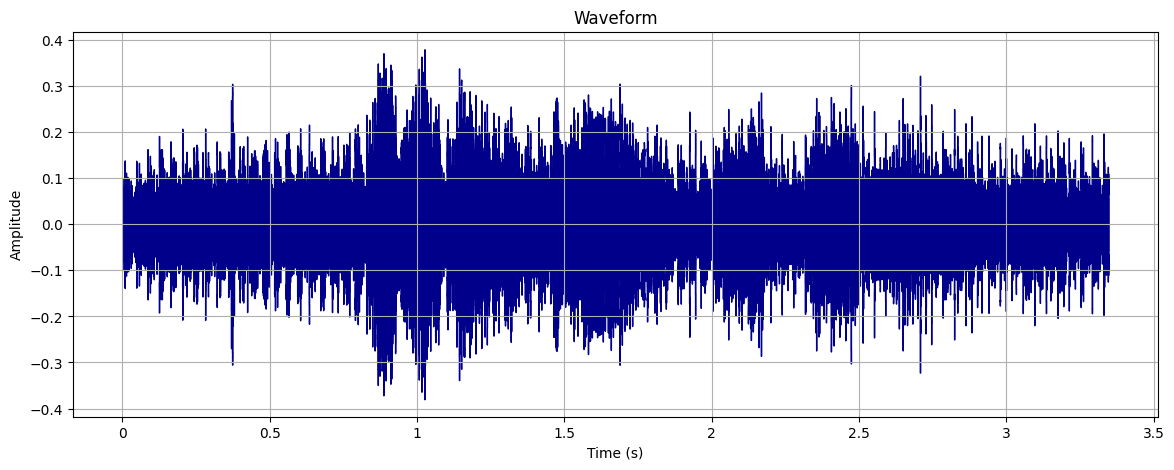

In [70]:
import matplotlib.pyplot as plt
import librosa.display

# Plot waveform
plt.figure(figsize=(14, 5))
librosa.display.waveshow(audio, sr=sr, color='darkblue' )
plt.title('Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()
plt.show()


CONCLUSION:



*   we can see a peak at time interval between 0.5-1 in the waveform.
*   The waveform plot provides a visual representation of the audio signal over time.

*   Amplitude values are plotted against time, showcasing the overall shape and characteristics of the audio.








**3.CREATING A SPECTROGRAM**



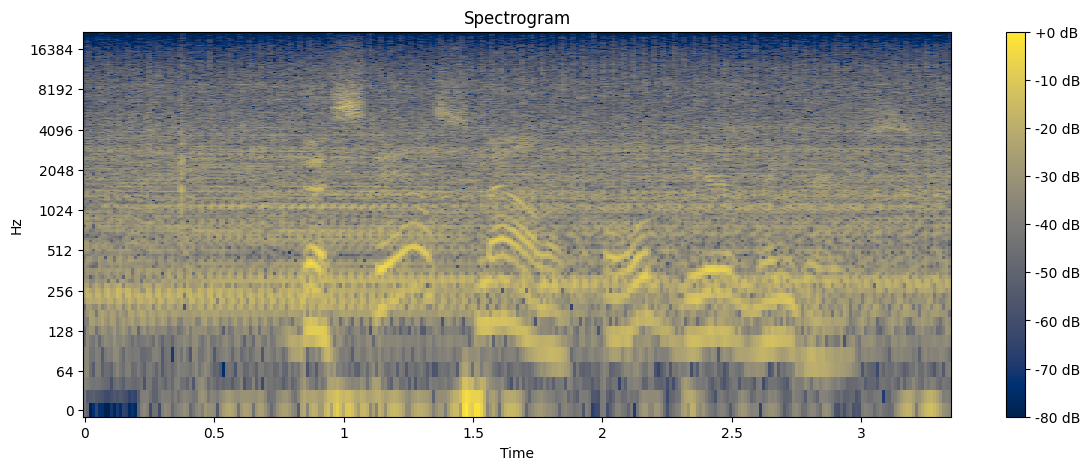

In [71]:
import numpy as np

# Compute the spectrogram
D = librosa.amplitude_to_db(np.abs(librosa.stft(audio)), ref=np.max)

# Plot the spectrogram
plt.figure(figsize=(14, 5))
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log', cmap='cividis')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()



CONCLUSION:



*   The spectrogram illustrates the frequency content of the audio signal over time.

*   Darker regions represent higher energy or louder frequencies, providing insights into the sound's composition.



**4.DYNAMIC RANGE COMPRESSION**


Dynamic range compression is a signal processing method employed to minimize the contrast between the loudest and softest segments of an audio signal, creating a more uniform overall volume. This is achieved through a compressor, which reduces the signal's gain when it surpasses a predetermined threshold. Commonly utilized in audio production, this technique helps manage volume fluctuations and enhance the perceived loudness of recordings.



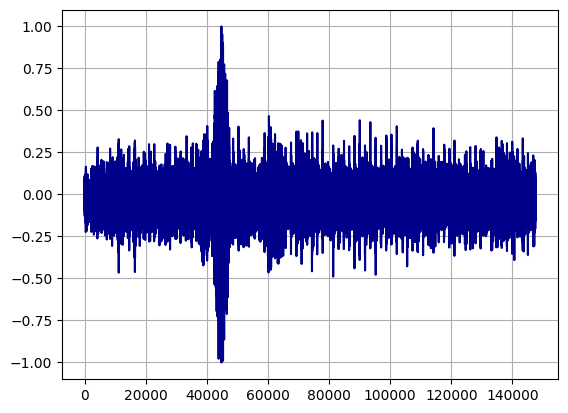

In [72]:
from sklearn.preprocessing import MinMaxScaler

# Apply dynamic range compression
compressed_audio = librosa.effects.preemphasis(audio)
scaler = MinMaxScaler(feature_range=(-1, 1))
compressed_audio = scaler.fit_transform(compressed_audio.reshape(-1, 1)).flatten()
plt.plot(compressed_audio,color='darkblue')
plt.grid()
plt.show()

CONCLUSION:


*   
Dynamic range compression has been applied to the audio, emphasizing certain frequency components.

*   
The transformation helps in normalizing the audio amplitudes, potentially enhancing certain features.


**5.AUDIO TRIMMING AND SILENCE REMOVAL**

1.Load the audio file.

2.Compute the amplitude envelope.

3.Find the frames with amplitudes below the threshold.

4.Remove those frames.

5.Save or process the trimmed audio.


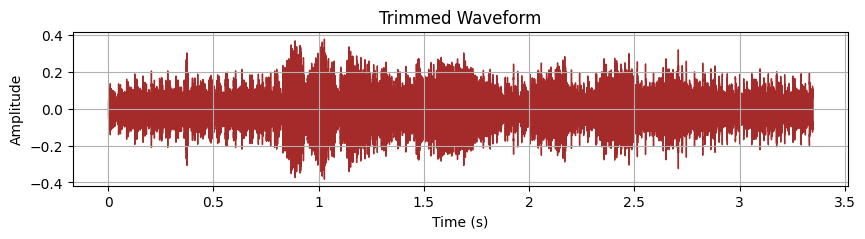

In [73]:
# Trim silent portions
trimmed_audio, _ = librosa.effects.trim(audio)

# Visualize trimmed waveform
plt.figure(figsize=(10, 2))
librosa.display.waveshow(trimmed_audio, sr=sr, color='brown')
plt.title('Trimmed Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

CONCLUSION:

*  The trimmed waveform plot displays the audio signal after removing silent portions.

*   This visualization emphasizes the active, non-silent regions of the audio, enhancing clarity.



**6.ONSET DETECTION**

The onset strength envelope (OSE) serves as a representation in audio signal processing that effectively captures abrupt changes or "onsets" within a sound signal. Its primary function is to quantify the magnitude of sudden shifts in the audio signal over time. Widely applied in tasks such as music information retrieval, audio segmentation, and beat tracking, the OSE is instrumental in identifying points in time where substantial changes in the audio signal take place. This capability proves valuable across various applications in audio analysis and processing.

In [74]:
if audio is None:
    raise ValueError("The 'audio' variable must contain audio data.")

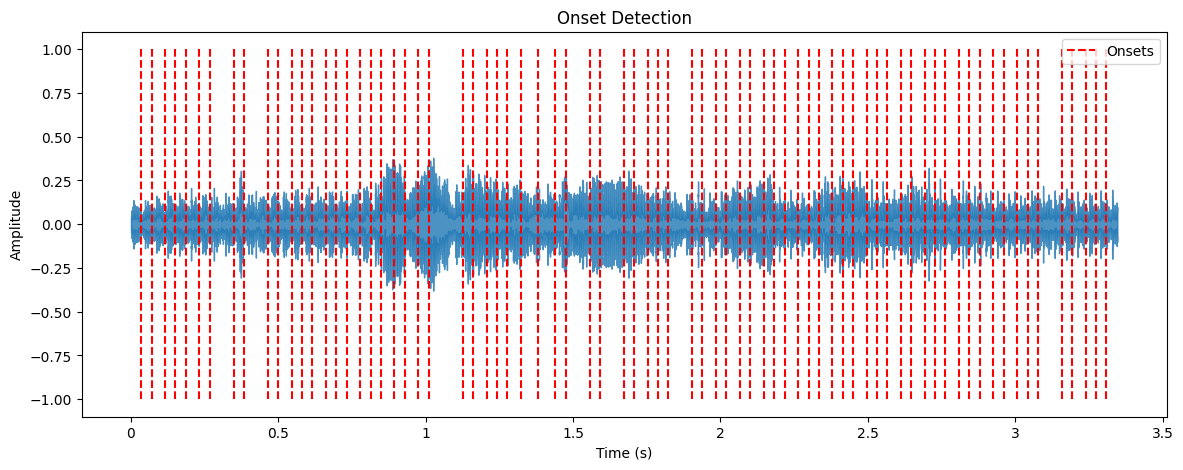

In [75]:
onset_frames = librosa.onset.onset_detect(y=audio, sr=sr)
onset_times = librosa.frames_to_time(onset_frames, sr=sr)

# Visualize onsets
plt.figure(figsize=(14, 5))
librosa.display.waveshow(audio, sr=sr, alpha=0.8)
plt.vlines(onset_times, -1, 1, color='r', linestyle='--', label='Onsets')
plt.title('Onset Detection')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()



CONCLUSION:
*   Onset detection identifies points in time where there is a significant change in the audio signal.
*   Red dashed lines indicate detected onsets, which may correspond to the start of audio notes.



In [76]:
import soundfile as sf

audio_data, sample_rate = sf.read('/content/jackhammer.wav')
# Calculate Zero Crossing Rate
import librosa
zero_crossings = librosa.zero_crossings(audio_data, pad=False)

print(f"Number of Zero Crossings: {sum(zero_crossings)}")

Number of Zero Crossings: [ 0 13]


In [77]:
energy = np.sum(audio_data**2) / float(audio_data.size)

print(f"Energy of the signal: {energy}")

Energy of the signal: 0.004683222169919392
